# 뉴스크롤링과 워드 클라우드

## 1. 라이브러리 불러오기

In [1]:
## bs4모듈에서 BeautifulSoup 함수를 불러온다.
from bs4 import BeautifulSoup as bs
## URL을 열고 HTML을 읽는 모듈, urllib를 불러온다.
import urllib.request
from konlpy.tag import Kkma #konlpy : 자바 깔아야함.
from konlpy.utils import pprint #한국어 정보처리를 위한 파이썬 패키지
from collections import Counter
import konlpy
import re #정규표현식

## URL
# URL = 'http://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=732&oid=015&aid=0003956688'

## 2. 함수 생성

In [2]:
## 크롤링 함수
def get_text(URL):    
    source_code_from_URL = urllib.request.urlopen(URL)
    '''
    해당 웹주소를 열고 Beautifulsoup으로 변수화 시킨다.
    BeautifulSoup객체 생성자의 2번재 인자로 'lxml'을 사용해 기존 'html'방식 대식 'lxml'방식으로 파싱하고,
    한글이 포함된 기사이기 때문에 encoding을 utf-8 방식을 채용했다.
    ''' 
    soup = bs(source_code_from_URL, 'lxml', from_encoding='utf-8')
    text = ''
    ## find_all 
    for t in soup.find_all('div', id="articleBodyContents"):
        text = text + str(t.find_all(text=True)) # text =True :텍스트만 나오게 
    return text+'\n'

## 메인 함수
def main():
    for i in range(0, 10):
        num = str(3956688 + i)
        URL = 'http://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=732&oid=015&aid=000'+num
        print(URL,end="=======================================")
        output_file_name = 'naver_crawling_ab.txt'
        open_output_file = open(output_file_name, 'w')
        result_text = get_text(URL)
        result_text = re.sub('[표]', '',result_text)
        result_text = re.sub('큐로홀딩스 외국인/기관 매매동향', '',result_text)
        result_text = re.sub('한경로보뉴스', '',result_text)
        result_text = re.sub('이 기사는 한국경제신문과 씽크풀이 공동 개발한 기사 자동생성', '',result_text)
        result_text = re.sub('알고리즘에 의해 실시간으로 작성된 것입니다.  - 기사오류문의 02-3277-9940', '',result_text)
        print(result_text)
        open_output_file.write(result_text)
        open_output_file.close()

In [3]:
print(__name__)
print(urllib.__name__)

__main__
urllib


## 3. 파싱

In [4]:
if __name__ == '__main__': 
    main()
    
#왜 이걸 해놓냐? : 이게 다른 데서는 main으로 실행 안되그로..암튼 나중에 이해 ㄱㄱ
## 귀엽네! 함수를 실행한거지.

    
#내가 실행하고 있는 코드들(?)이 __main__임.
#참이면 main()함수를 실행하세요
#모듈의 __name__은 __main__이 아니다.



http://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=732&oid=015&aid=0003956688=======================================['\n', ' 본문 내용 ', '\n', ' TV플레이어 ', '\n', ' // TV플레이어 ', '\n', '\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n', '\n', "'유니버시티 블록체인 리서치 이니셔티브' 프로젝트 수행", '고려대 본관. / 사진=한경 DB', '고려대가 글로벌 블록체인 기업 리플(Ripple)과 파트너십을 체결해 관련 전문인력 양성과 연구 프로젝트 수행에 나선다.', '리플은 블록체인을 이용해 저렴하면서 빠른 송금 서비스를 제공하는 회사로 자체 암호토큰 XRP를 이용한 서비스도 제공한다.', '7일 고려대에 따르면 이 대학 정보보호대학원 블록체인보안연구센터는 지난 4일 리플과 장기 연구 프로젝트 ‘유니버시티 블록체인 리서치 이니셔티브(University Blockchain Research Initiative)’ 수행을 위한 파트너십을 맺었다.', '세계 유수의 대학들과 함께 블록체인 및 암호화폐 관련 학문적·기술적 연구를 수행하도록 지원하는 연구 프로젝트다. 이 프로젝트 수행을 위해 리플과 파트너십을 맺은 대학은 MIT(매사추세츠공대) 프린스턴대 스탠퍼드대 등 전세계 17곳으로 국내에서는 고려대가 유일하다.', '파트너십 체결에 따라 고려대 블록체인보안연구센터는 블록체인 합의 알고리즘의 안전성, 스마트 콘트랙트(smart contract)의 안전성 등 블록체인 및 암호화폐에 필요한 보안 기술을 중점적으로 연구하며 리플은 연구 수행에 필요한 재정적·기술적 지원을 제공한다.', '아울러 사회적으로 부족한 블록체인 전문가를 양성하는 효과도 있을 것으로 예상된다.', '에릭 반 밀텐버그 리플 비즈니스 운영 수석부사장은 “‘유니버

## 4. 정규표현식으로 정제

In [5]:
'''
텍스트 정제 모듈
특수기호 모두 제거
'''
## fillter 함수
def filter_text(text):
    filter_text = re.sub('[a-zA-Z]', '', text)
    filter_text = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]','',filter_text)
    filter_text = re.sub('본문 내용', '',filter_text)
    filter_text = re.sub('플레이어', '',filter_text)
    filter_text = re.sub('오류를 우회하기 위한 함수 추가', '',filter_text)
    filter_text = re.sub('한경닷컴', '',filter_text)
    filter_text = re.sub('9 기사제보', '',filter_text)
    filter_text = re.sub('및 보도자료', '',filter_text)
    filter_text = re.sub('한경닷컴 바로가기', '',filter_text)
    filter_text = re.sub('글방', '',filter_text)
    filter_text = re.sub('모바일한경 구독신청', '',filter_text)
    filter_text = re.sub('ⓒ 한국경제', '',filter_text)
    filter_text = re.sub('무단전재 및 재배포 금지', '',filter_text)
    filter_text = re.sub('기사오류문의 0232779940', '',filter_text)
    filter_text = re.sub('바로가기', '',filter_text)
    return filter_text

# 메인함수
def main():
    output_file_name = 'naver_crawling_filter_abc.txt'
    input_file_name = 'naver_crawling_ab.txt'
    read_file = open(input_file_name, 'r')
    write_file = open(output_file_name, 'w')
    text = read_file.read()
    print("---------수정 전---------")
    print(text)
    text = filter_text(text)
    text.replace("본문", "").replace('내용', '').replace('한국경제','').replace('모바일한경 구독신청', '')
    print()
    print("---------수정 후---------")
    print(text)
    write_file.write(text+'\n')
    read_file.close()
    write_file.close()
    return text+'\n'

In [6]:
if __name__ == '__main__':
    main()

---------수정 전---------
['\n', ' 본문 내용 ', '\n', ' TV플레이어 ', '\n', ' // TV플레이어 ', '\n', '\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n', '\n\t\n\t7일 일본 닛케이225지수(닛케이평균주가)는 전일 대비 197.53포인트(0.87%) 상승한 22,823.26으로 마감했다.', '한경닷컴', '[', '한경닷컴 바로가기', '] [', '글방', '] [', '모바일한경 구독신청', '] ', 'ⓒ 한국경제 & ', 'hankyung.com', ', 무단전재 및 재배포 금지\n\t', ' // 본문 내용 ', '\n']


---------수정 후---------
                   7일 일본 닛케이225지수닛케이평균주가는 전일 대비 19753포인트087 상승한 2282326으로 마감했다                       



## 5. 파일로 저장(txt)

In [7]:
f = open('naver_crawling_filter_abc.txt')

## 번외) 워드클라우드

In [8]:
from collections import Counter
import urllib
import random
import webbrowser

from konlpy.tag import Hannanum
from lxml import html
import pytagcloud
import sys

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
#url open
urlopen = urllib.request.urlopen

# make random color
r = lambda:random.randint(0, 255)
color = lambda:(r(), r(), r())

# text count
def get_tags(text, ntags=50, multiplier=10):
    h = Hannanum() #형태소 분리 모듈중의 하나임. hannanum / 트위터에서 나온 모듈도 있다
    nouns = h.nouns(text)
    count = Counter(nouns)
    return [{'color':color(), 'tag':n, 'size':c*multiplier} for n, c in count.most_common(ntags)]

# draw cloud
def draw_cloud(tags, filename, fontname='Korean NanumGothic', size=(800, 600)):
    pytagcloud.create_tag_image(tags, filename, fontname=fontname, size=size)
    webbrowser.open(filename)

In [10]:
# load file and make wordcloud
f = open('naver_crawling_filter_abc.txt')
line = f.read()
tags = get_tags(line)
# draw_cloud(tags, 'wordcloud4.png')

In [11]:
tags 
#색이 다양하게 나올 수 있게 위에서 randdit 함수를 사용했음. 
#size : 단어의 빈도수..count 함수 사용해서 체크함 -> 이걸 이용해서 워드클라우드 그릴 수 있음

[{'color': (153, 214, 3), 'tag': '7일', 'size': 10},
 {'color': (2, 171, 29), 'tag': '일본', 'size': 10},
 {'color': (180, 44, 195), 'tag': '닛케이225지수닛케이평균주가', 'size': 10},
 {'color': (155, 74, 43), 'tag': '전', 'size': 10},
 {'color': (140, 135, 106), 'tag': '대비', 'size': 10},
 {'color': (174, 253, 215), 'tag': '19753포인트087', 'size': 10},
 {'color': (71, 240, 86), 'tag': '상승', 'size': 10},
 {'color': (210, 217, 10), 'tag': '2282326', 'size': 10},
 {'color': (26, 98, 6), 'tag': '마감', 'size': 10}]

In [12]:
#워드 클라우드

from wordcloud import WordCloud
from konlpy.tag import Hannanum, Okt
import matplotlib.pyplot as plt

def make_cloud(keyworkds, font_path, width=800, height=800):
    wordcloud=WordCloud(font_path, width, height)
    
    h=Okt()
    nouns=h.nouns(keywords)
    count = Counter(nouns)
    
    wordcloud = wordcloud.generate_from_frequencies(count)
    
    array= wordcloud.to_array()
    
    fig =plt.figure(figsize=(10,10))
    plt.imshow(array,interpolation='bilinear')
    plt.show()

## 번외) 워드클라우드 생성

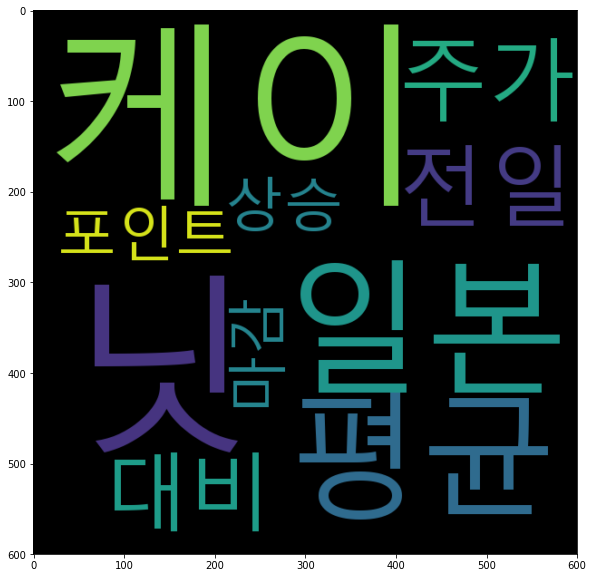

In [16]:
f = open('naver_crawling_filter_abc.txt')
keywords=f.read() # 'f' : 위에 txt파일로 만든 문서
make_cloud(keywords, "c:/Windows/Fonts/malgun.ttf", 600,600)